Jonathan Fischer, using Julia

# Problem Set 2

In [1]:
using Random, Distributions
using Plots
using DataFrames
gr()
using StatsBase
using DelimitedFiles
using LinearAlgebra
using Distances
using Symbolics
using Latexify

## 1) Sampling from a Gaussian distribution

a) Generate normal distribution with mu = 2 and sigma = 3

In [151]:
gaussian = Normal(2,3)

Normal{Float64}(μ=2.0, σ=3.0)

Take 2000 random samples from gaussian

In [152]:
samples = rand(gaussian,2000)

2000-element Vector{Float64}:
  2.710936359287673
  3.634122102940154
  0.27073034453806355
  2.1060442810748574
  2.828813060880198
  1.8989829464026176
  1.3815826486097165
  0.13619809405205263
  1.4229984354291862
  0.6273079628407381
  8.46952106909348
  6.311677514169329
 -3.9201863961409593
  ⋮
  2.818254204585635
 -1.0447469676854464
  1.7257284597264175
  3.299969572703451
  4.032946359786357
 -1.9725640156923112
 -2.789747812098544
  5.340856768782365
 -0.579966571858388
  7.9488104610497645
  6.615733368653385
  5.5680199391283285

b) Fit a histogram to samples with 35 bins

In [153]:
hist = fit(Histogram, samples, nbins=35, closed=:left)

Histogram{Int64, 1, Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}}
edges:
  -10.0:1.0:12.0
weights: [1, 0, 4, 6, 13, 20, 57, 74, 119, 186  …  268, 224, 191, 149, 78, 49, 33, 12, 6, 2]
closed: left
isdensity: false

Frequency Histogram

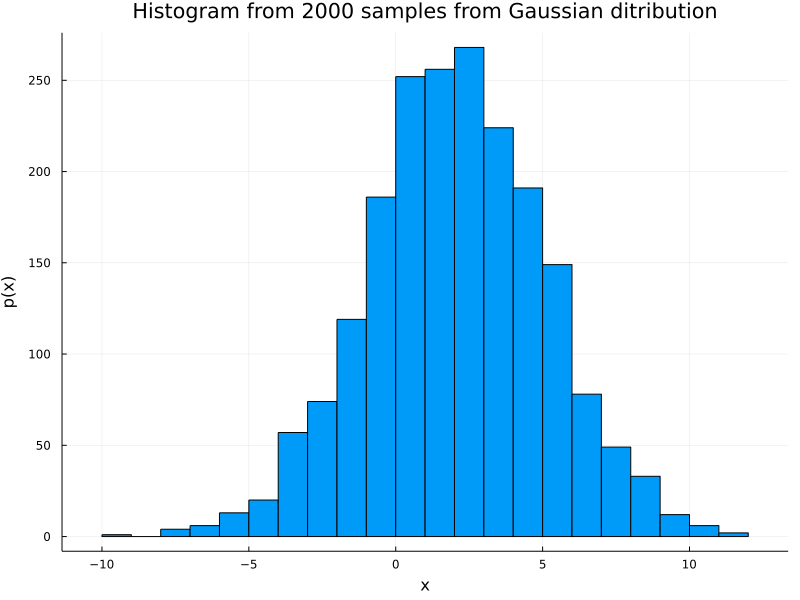

In [157]:
plot1 = plot(hist,size=(800,600),legend=false)
title!("Histogram from 2000 samples from Gaussian ditribution")
xlabel!("x")
ylabel!("p(x)")
display(plot1)
savefig("gaussian_frequency_hist.png")

c) Normalize histogram into PDF

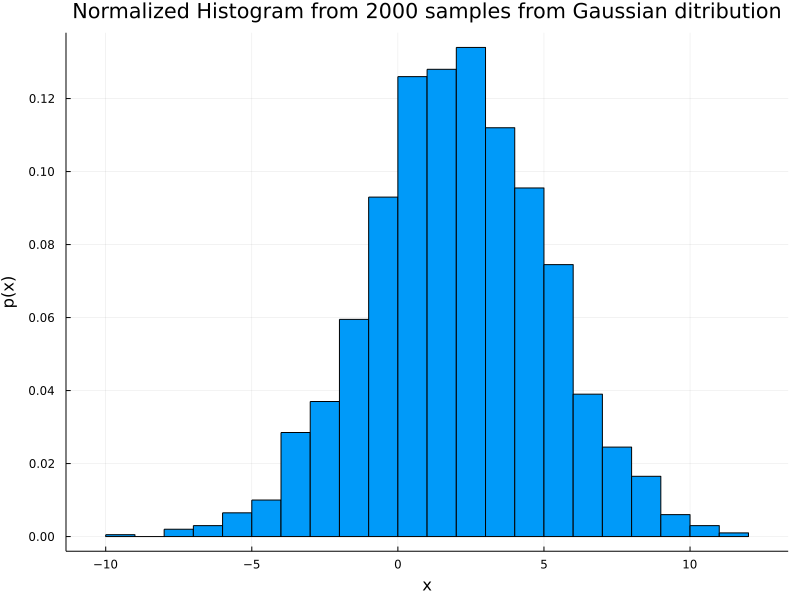

In [158]:
norm_hist = normalize(hist, mode=:pdf)
plot2 = plot(norm_hist,size=(800,600),legend=false)
title!("Normalized Histogram from 2000 samples from Gaussian ditribution")
xlabel!("x")
ylabel!("p(x)")
savefig("normalized_gaussian_histogram.png")
display(plot2)

Proof that integral = 1

In [18]:
norm(norm_hist) #calculated absolute value of integral of normalized histogram

0.9999999999999997

## 2) Sampling from a discrete distribution 

Frequencies for each amino acid sampled from uniform frequency distribution

In [159]:
protein  = rand(range(1,20),300) #take 300 random samples from a uniform distribution of 1:20
aa_symbols =["Ala", "Arg", "Asn", "Asp", "Cys", "Gln", "Glu", "Gly", "His", "Ile", "Leu", "Lys", "Met", "Phe", "Pro", "Ser", "Thr", "Trp", "Tyr", "Val"] #list for symbols for each amino acid
countlist = [count(i->i==x,protein) for x in range(1,20)] #count the amount of observations for each amino acid from sample
freqdict = Dict(aa=>n for (aa,n) in zip(aa_symbols,countlist)) #map amino acid to count

Dict{String, Int64} with 20 entries:
  "Met" => 10
  "Trp" => 12
  "Leu" => 15
  "Gly" => 19
  "Gln" => 16
  "Lys" => 14
  "His" => 10
  "Ala" => 14
  "Pro" => 15
  "Asp" => 20
  "Phe" => 12
  "Cys" => 17
  "Ser" => 15
  "Thr" => 12
  "Glu" => 13
  "Tyr" => 15
  "Val" => 22
  "Ile" => 23
  "Arg" => 16
  "Asn" => 10

Bar plot

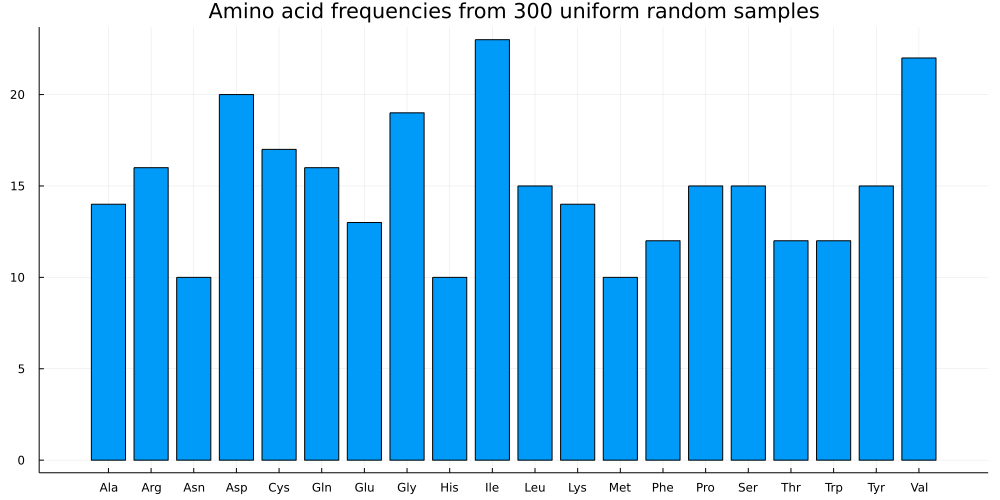

In [160]:
plot3 = bar(countlist,xticks=(1:20,aa_symbols),size = (1000,500),legend=false)
title!("Amino acid frequencies from 300 uniform random samples")
savefig("uniform_aa_histogram.png")
display(plot3)

b)

In [161]:
aa_labels = Dict(zip(aa_symbols,collect(1:20))) #map index to amino acid
res_freqs = FrequencyWeights([8.25,5.53,4.06,5.45,1.37,3.93,6.75,7.07,2.27,5.96,9.66,5.84,2.42,3.86,4.70,6.56,5.34,1.08,2.92,6.87]) #input known residue frequencies
res_freqs = FrequencyWeights([x/100 for x in res_freqs]) #normalize 
cum_res_freqs = accumulate(+,res_freqs) #accumulate for cumulative distribution

20-element Vector{Float64}:
 0.0825
 0.1378
 0.1784
 0.2329
 0.24659999999999999
 0.2859
 0.3534
 0.4241
 0.4468
 0.5064
 0.603
 0.6614
 0.6856
 0.7242
 0.7712
 0.8368
 0.8902
 0.901
 0.9302
 0.9989

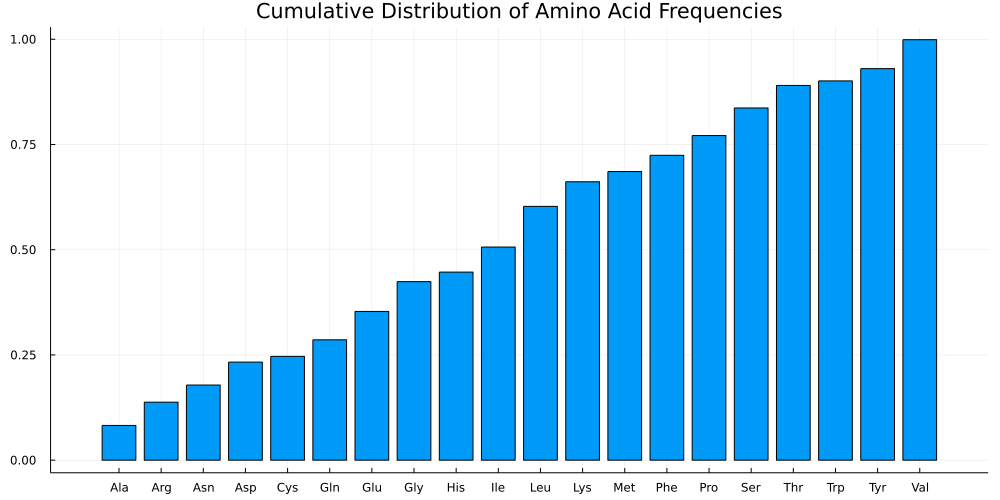

In [162]:
plot4 = bar(accumulate(+,res_freqs),xticks=(1:20,aa_symbols),size=(1000,500), legend=false)
title!("Cumulative Distribution of Amino Acid Frequencies")
savefig("cum_dist_aa_freq.png")
display(plot4)

c)

In [163]:
aa_counts = Dict()
for i = collect(1:300)
    aa = sample(aa_symbols,res_freqs)
    aa_counts[aa] = get(aa_counts,aa,0) + 1
end
map!(x->x/3, values(aa_counts))
aa_counts

Dict{Any, Any} with 20 entries:
  "Gln" => 4.0
  "Ala" => 6.66667
  "Cys" => 1.0
  "Ser" => 8.0
  "Thr" => 3.0
  "Glu" => 7.0
  "Tyr" => 2.33333
  "Ile" => 8.0
  "Met" => 2.66667
  "Asn" => 4.0
  "Trp" => 1.0
  "Leu" => 10.6667
  "Gly" => 7.66667
  "Lys" => 5.0
  "His" => 1.0
  "Pro" => 5.33333
  "Asp" => 3.66667
  "Phe" => 4.0
  "Val" => 8.66667
  "Arg" => 6.33333

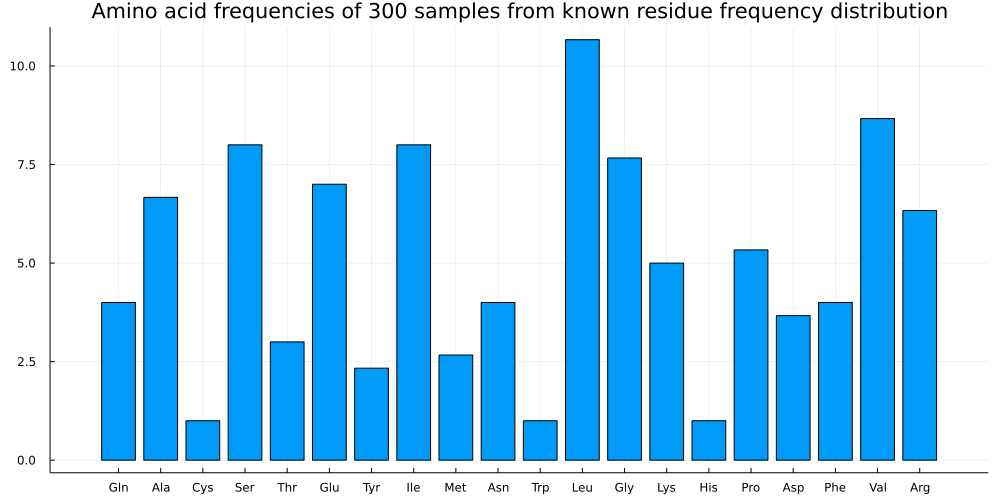

In [164]:
plot5 = bar(collect(values(aa_counts)),xticks=(1:20,collect(keys(aa_counts))),size=(1000,500),legend=false)
title!("Amino acid frequencies of 300 samples from known residue frequency distribution")
savefig("actual_aa_frequency.png")
display(plot5)

Error between sampled frequencies and known frequencies

In [95]:
ordered_counts = [aa_counts[x] for x in aa_symbols]
norm(ordered_counts-res_freqs)

24.33040067115396

d)

No, this is not a realistic sequence, because in vivo the amino acids have different shapes and charge, so the probability of a ribosome physically sampling one of the another is not directly proportional to their population frequency. 

## 3) Monte Carlo sampling of Lennard-Jones particles

In [ ]:
# 1. choose initial state x
# 2. Generate move from a distribution to a newstate g(x->x') must be reversible otherwise won't be equilibrium
# 3. Accept or reject this move according to some probability that you compare to a URN
# 4. Store new state (either x' or x)
# 5. Forward move in configuration must be equally likely as going back to original state

a)

In [2]:
coords = readdlm("init_crds_boxl_3.5.dat")
lj_df = DataFrame(coords,[:x,:y,:z])

,x,y,z
,Float64,Float64,Float64
1,-1.20196,0.0493745,1.34467
2,0.957627,0.115361,-1.35331
3,-0.188974,0.523728,-1.36514
4,-1.61991,-0.0409586,0.190333
5,1.5412,-0.756257,-1.0001
6,-1.11554,-1.66646,-0.990655
7,-0.703262,-0.135565,-0.212298
8,1.05415,1.37549,-1.37649
9,-0.0243404,0.0902458,0.676829


b) Calculate distances and energy

In [3]:
function calc_distance(x1,x2, periodic, L=3.5) #calculate distance between a single pair of points
    dx = x1-x2 
    periodic ? dx - L*round(dx/L) : dx #ternary operator returns output as periodic or not
end

calc_distance (generic function with 2 methods)

In [4]:
function update_R(R, coords,periodic=true) #update distance matrix R
    for (i,p1) in enumerate(collect(eachrow(coords))[1:29])
        for p2 in collect(eachrow(coords))[i+1:end]
            distance = norm(calc_distance.(p1,p2,periodic))
            push!(R,distance)
        end
    end
end

update_R (generic function with 2 methods)

In [5]:
function calc_LJ(r) # calculate Lennard_Jones potential for a pairwise distance
    4*0.25((1/r)^12 - (1/r)^6)
end

calc_LJ (generic function with 1 method)

In [6]:
function calc_PE(coords, periodic = true) #calculate the system potential energy from R
    R = []
    update_R(R, coords, periodic)
    sum(calc_LJ,R)
end

calc_PE (generic function with 2 methods)

In [136]:
println("Initial potential energy with periodic boundary conditions: $(calc_PE(coords,true)) J") #initial potential energy

Initial potential energy with periodic boundary conditions: -29.472115017422293 J


In [137]:
println("Initial potential energy without periodic boundary conditions: $(calc_PE(coords,false)) J")

Initial potential energy without periodic boundary conditions: -16.403676674238348 J


## c) MCMC

Assign Displacement and enforce PBC

In [11]:
function assign_displacement(coords, p, distribution)
    pos = coords[p,:]
    attempted_displacement = rand(distribution,3) #get displacement 
    pos+attempted_displacement #attempted new position
end

assign_displacement (generic function with 2 methods)

In [12]:
function update_pos(coords, PE, kT, d_distribution, particle_idxs, urn_dist)
    p = rand(particle_idxs)
    displaced_p = assign_displacement(coords, p, d_distribution)
    while any(i->(abs(i)>3.5),displaced_p)
        displaced_p = assign_displacement(coords,p, d_distribution)
    end
    newcoords = copy(coords)
    newcoords[p,:] = displaced_p
    R = []
    newPE = calc_PE(newcoords)
    if newPE > PE
        # println("Original: $(PE)")
        # println("New PE: $(newPE)")
        # println("newPE > PE")
        acc = min(1,exp(-(newPE-PE)/kT))
        urn = rand(urn_dist) # changed because previous urn was normal distribution
        if acc >= urn
            # println("acc: $(acc) >= urn: $(urn)")
            # println("Accepted")
            return newcoords, newPE
        else
            # println("acc: $(acc) < urn: $(urn)")
            # println("Rejected")
            return coords, PE 
        end
    else
        # println("Original: $(PE)")
        # println("New PE: $(newPE)")
        # println("newPE < PE")
        # println("Accepted")
        return newcoords, newPE 
    end
end

update_pos (generic function with 1 method)

## Run simulation

In [13]:
function MCMC(d,kT)
    coords = readdlm("init_crds_boxl_3.5.dat") #read in coordinates each time new sim is called
    dis_distribution = Uniform(-d/2,d/2) #generate uniform distribution with a range of delta to sample displacement from
    urn_dist = Uniform(0,1) #generate uniform distribution for URN to test acceptance probability against
    particle_idxs = collect(1:30) #particle ids for choosing a particle to displace

    PE = calc_PE(coords) #calculate potential energy of the system
    E_list = [] #collect energy at each iteration into list
    for iter in collect(1:100000) #100,000 iterations
        coords,PE = update_pos(coords, PE, kT, dis_distribution, particle_idxs,urn_dist) #update position and return new positions and energy
        push!(E_list,PE) #add energy to list
    end
    return mean(E_list) #return the average energy of the simulation
end

MCMC (generic function with 1 method)

In [14]:
println("$(MCMC(0.1,1)) J")

-20.54262223009436 J


d)

In [148]:
println("$(MCMC(0.1,0.5)) J")

-30.049007052576382 J


In [149]:
println("$(MCMC(0.1,0.1)) J")

-32.90244276991615 J


Plot of average energy using each combination of kT and delta values

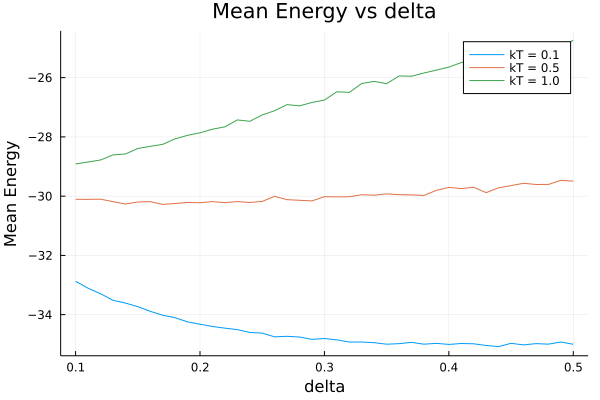

In [101]:
kTlist = [0.1,0.5,1.0]
deltalist = collect(0.1:0.01:0.5)

mcplot = plot(title="Mean Energy vs delta")
xlabel!("delta")
ylabel!("Mean Energy")

for kT in kTlist #kT
    simlist= []
    for d in deltalist #delta
        push!(simlist,MCMC(coords,d,kT)) #record each average energy
    end
    plot!(mcplot,deltalist,simlist,label="kT = $(kT)")
end 

mcplot 

## 4) Counting and Diffusion

In [324]:
balls = ["w","w","w","w","b","b","b","b"]
perms = Set()

for it in collect(1:1000000)
    membrane = [[],[]]
    for draw in balls
        if all(i->(length(i)<4),membrane)
            push!(membrane[rand([1,2])],draw)
        else
            idx = findall(i->(length(i)<4),membrane)
            # println(idx)
            push!(membrane[idx[1]],draw)
            # print("else activated")
            # if membrane[1] == 4
            #     println(membrane[1])
            #     push!(membrane[2],draw)
            #     println(membrane[2])
            # elseif membrane[2] == 4
            #     push!(membrane[1],draw)
            # end
        end
    end
    push!(perms,membrane)
end

length(perms)

5

In [325]:
perms

Set{Any} with 5 elements:
  Vector{Any}[["w", "w", "w", "b"], ["w", "b", "b", "b"]]
  Vector{Any}[["b", "b", "b", "b"], ["w", "w", "w", "w"]]
  Vector{Any}[["w", "b", "b", "b"], ["w", "w", "w", "b"]]
  Vector{Any}[["w", "w", "w", "w"], ["b", "b", "b", "b"]]
  Vector{Any}[["w", "w", "b", "b"], ["w", "w", "b", "b"]]

Assuming that balls of the same color aren't distinguishable, there are only 5 unique arrangements. If the positions on each side of the membrane can be distinguished, the number of arrangements would be calculated by N!/r!(N-r)! or 8!/4!(8-4)! = 70 arrangements

b)

In [127]:
println("Probability of having 4 black particles on the left is $((factorial(4)^2/(factorial(8)))*100) %")
println("Probability of 1 white and 3 black particles on the left is $((factorial(4)^2/factorial(8))*4*100) %")
println("Probability of 2 white and 2 black particles on the left is $((4^2*3^2)/(8*7*6*5)*100) %")

println("\n2 of each color on the left side is the most likely arrangement")

Probability of having 4 black particles on the left is 1.4285714285714286 %
Probability of 1 white and 3 black particles on the left is 5.714285714285714 %
Probability of 2 white and 2 black particles on the left is 8.571428571428571 %

2 of each color on the left side is the most likely arrangement


c)

In [128]:
println("Probability that the white particle on the left switches with the black particle on the right: $(0.25^2*100) %")
println("Probability that one of 3 black particles on the left switches with one of 3 white particles on the right: $(0.75^2*100) %")

Probability that the white particle on the left switches with the black particle on the right: 6.25 %
Probability that one of 3 black particles on the left switches with one of 3 white particles on the right: 56.25 %


## 5) Harmonic oscillators

In [134]:
@variables x x0 k a m t  
D = Differential(x)

U = 0.5*k*(x-x0)^2
dU = expand_derivatives(D(U))

0.5k*(2x - 2x0)

function x(t) for bond length as function of time

In [144]:
function h_oscillator(t,x0=1,k=27,m=3)
    x0*cos(√(k/m)*t) + x0
end

h_oscillator (generic function with 4 methods)

Velocity of bond length

In [141]:
Dt = Differential(t)
h_osc = x0*cos(√(k/m)*t) + x0
dx = expand_derivatives(Dt(h_osc))

-x0*sqrt(k / m)*sin(t*sqrt(k / m))

Force on bond length

In [142]:
Dt = Differential(t)
# h_osc = x0*cos(√(k/m)*t) + x0
dx2 = expand_derivatives(Dt(dx))

-x0*(sqrt(k / m)^2)*cos(t*sqrt(k / m))

In [145]:
xvals = []
tvals = []
dxvals = []
fvals = []
for ti in collect(0:0.01:10)
    push!(xvals,(h_oscillator(ti)))
    push!(tvals,ti)
    push!(dxvals,Symbolics.value(substitute(dx,Dict(m=>3,k=>27,x0=>1,t=>ti))))
    push!(fvals,Symbolics.value(substitute(dx2,Dict(m=>3,k=>27,x0=>1,t=>ti))))
end

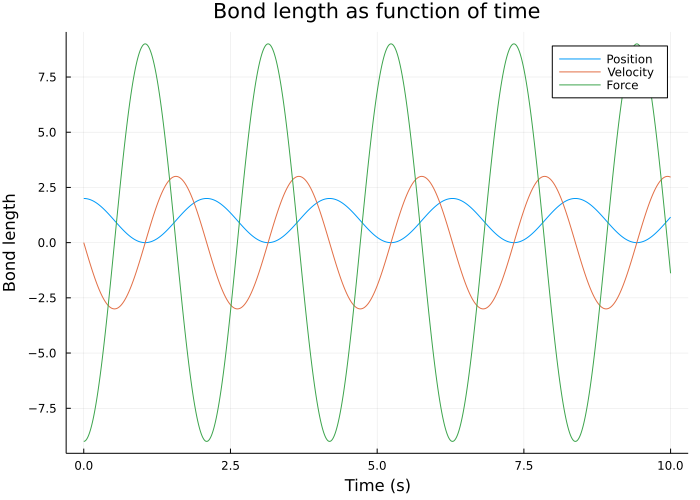

In [165]:
plot6 = plot(tvals,xvals,size=(700,500),labels="Position")
plot!(tvals,dxvals,labels="Velocity")
plot!(tvals,fvals, labels="Force")
title!("Bond length as function of time")
ylabel!("Bond length")
xlabel!("Time (s)")
savefig("Bond_length.png")
display(plot6)
